In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv', )

/Users/cc/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426196 entries, 0 to 2426195
Data columns (total 14 columns):
dataset_id               int64
as_of_date               object
company_name             object
followers_count          int64
employees_on_platform    int64
link                     object
industry                 object
date_added               datetime64[ns]
date_updated             datetime64[ns]
description              object
website                  object
entity_id                float64
cusip                    float64
isin                     float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(6)
memory usage: 259.1+ MB


In [59]:
"""
What is the trend of posting jobs on Linkedin for Banking, and other large industies as Retail, Pharmaceuticals,
Information Technology and Services, and Oil & Energy?
"""
#change datatype to datetime
df[["date_added","date_updated"]] = df[["date_added","date_updated"]].astype('datetime64[ns]') 
years = df[df['industry']=='Banking'].groupby(df.date_added.dt.year)['industry'].count().keys().to_list()
bk_num_posting = df[df['industry']=='Banking'].groupby(df.date_added.dt.year)['industry'].count().to_list()
re_num_posting = df[df['industry']=='Retail'].groupby(df.date_added.dt.year)['industry'].count().to_list()
ph_num_posting = df[df['industry']=='Pharmaceuticals'].groupby(df.date_added.dt.year)['industry'].count().to_list()
it_num_posting = df[df['industry']=='Information Technology and Services'].groupby(df.date_added.dt.year)['industry'].count().to_list()
oi_num_posting = df[df['industry']=='Oil & Energy'].groupby(df.date_added.dt.year)['industry'].count().to_list()

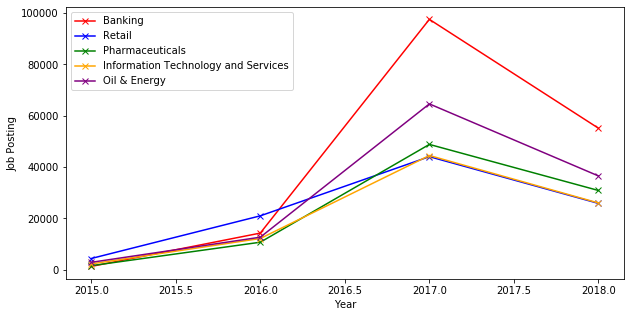

In [123]:
plt.plot(years, bk_num_posting, marker = 'x', color = 'r')
plt.plot(years, re_num_posting, marker = 'x', color = 'b')
plt.plot(years, ph_num_posting, marker = 'x', color = 'g')
plt.plot(years, it_num_posting, marker = 'x', color = 'orange')
plt.plot(years, oi_num_posting, marker = 'x', color = 'purple')
plt.xlabel('Year')
plt.ylabel('Job Posting')
plt.title('Job Posting on LinkedIn from the Five Industries')
plt.legend(['Banking','Retail','Pharmaceuticals','Information Technology and Services','Oil & Energy'])
fig = plt.gcf()
fig.set_size_inches(10, 5)
fig.savefig('jobPosting.png', dpi=400)

In [112]:
bk_follower_ = df[df['industry']=='Banking'].groupby([df.date_added.dt.year, df.company_name])["followers_count"].mean().reset_index()
bk_follower = bk_follower_.groupby([bk_follower_.date_added])['followers_count'].sum().to_list()

re_follower_ = df[df['industry']=='Retail'].groupby([df.date_added.dt.year,df.company_name])["followers_count"].mean().reset_index()
re_follower = re_follower_.groupby([re_follower_.date_added])['followers_count'].sum().to_list()

ph_follower_ = df[df['industry']=='Pharmaceuticals'].groupby([df.date_added.dt.year,df.company_name])["followers_count"].mean().reset_index()
ph_follower = ph_follower_.groupby([ph_follower_.date_added])['followers_count'].sum().to_list()

it_follower_ = df[df['industry']=='Information Technology and Services'].groupby([df.date_added.dt.year,df.company_name])["followers_count"].mean().reset_index()
it_follower=it_follower_.groupby([it_follower_.date_added])['followers_count'].sum().to_list()

oi_follower_ = df[df['industry']=='Oil & Energy'].groupby([df.date_added.dt.year,df.company_name])["followers_count"].mean().reset_index()
oi_follower = oi_follower_.groupby([oi_follower_.date_added])['followers_count'].sum().to_list()


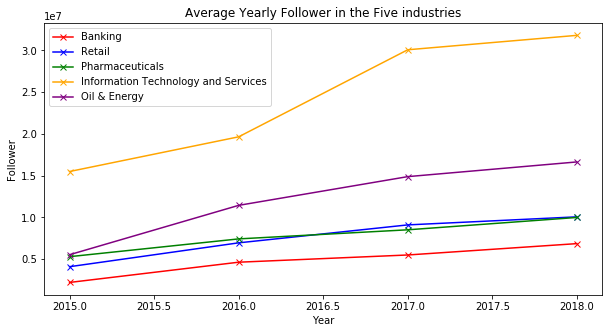

In [124]:
plt.plot(years, bk_follower, marker = 'x', color = 'r')
plt.plot(years, re_follower, marker = 'x', color = 'b')
plt.plot(years, ph_follower, marker = 'x', color = 'g')
plt.plot(years, it_follower, marker = 'x', color = 'orange')
plt.plot(years, oi_follower, marker = 'x', color = 'purple')
plt.xlabel('Year')
plt.ylabel('Follower')
plt.title('Average Yearly Followers in the Five industries')
plt.legend(['Banking','Retail','Pharmaceuticals','Information Technology and Services','Oil & Energy'])
fig = plt.gcf()
fig.set_size_inches(10, 5)
fig.savefig('Follower.png', dpi=400)

In [116]:
bk_employees_ = df[df['industry']=='Banking'].groupby([df.date_added.dt.year, df.company_name])["employees_on_platform"].mean().reset_index()
bk_employees = bk_employees_.groupby([bk_follower_.date_added])['employees_on_platform'].sum().to_list()

re_employees_ = df[df['industry']=='Retail'].groupby([df.date_added.dt.year,df.company_name])["employees_on_platform"].mean().reset_index()
re_employees = re_employees_.groupby([re_follower_.date_added])['employees_on_platform'].sum().to_list()

ph_employees_ = df[df['industry']=='Pharmaceuticals'].groupby([df.date_added.dt.year,df.company_name])["employees_on_platform"].mean().reset_index()
ph_employees = ph_employees_.groupby([ph_follower_.date_added])['employees_on_platform'].sum().to_list()

it_employees_ = df[df['industry']=='Information Technology and Services'].groupby([df.date_added.dt.year,df.company_name])["employees_on_platform"].mean().reset_index()
it_employees = it_employees_.groupby([it_follower_.date_added])['employees_on_platform'].sum().to_list()

oi_employees_ = df[df['industry']=='Oil & Energy'].groupby([df.date_added.dt.year,df.company_name])["employees_on_platform"].mean().reset_index()
oi_employees = oi_employees_.groupby([oi_follower_.date_added])['employees_on_platform'].sum().to_list()


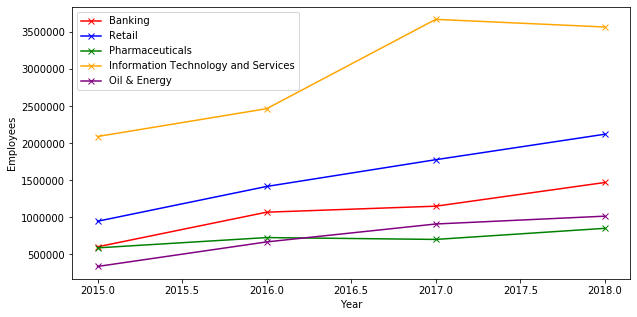

In [118]:
plt.plot(years, bk_employees, marker = 'x', color = 'r')
plt.plot(years, re_employees, marker = 'x', color = 'b')
plt.plot(years, ph_employees, marker = 'x', color = 'g')
plt.plot(years, it_employees, marker = 'x', color = 'orange')
plt.plot(years, oi_employees, marker = 'x', color = 'purple')
plt.xlabel('Year')
plt.ylabel('Employees')
plt.title('Average Yearly Employees on LinkedIn in the Five industries')
plt.legend(['Banking','Retail','Pharmaceuticals','Information Technology and Services','Oil & Energy'])
fig = plt.gcf()
fig.set_size_inches(10, 5)
fig.savefig('Employees.png', dpi=400)